In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import display
import time
import copy
import random
from sklearn.decomposition import PCA

In [2]:
# constants
beta = 4

In [3]:
# creating memories
memory_1 = np.ones([10, 10])
memory_2 = np.ones([10, 10])
memory_3 = np.ones([10, 10])
memory_1[3, :] = -1.0
memory_1[:, 3] = -1.0
memory_2[5:7, 5:7] = -1.0
memory_3[0, :] = -1.0
memory_3[9, :] = -1.0
memory_3[:, 0] = -1.0
memory_3[:, 9] = -1.0

In [4]:
# all functions
# add a memory to weight
def weight_update(memory, w):
    for i in range(100):
        for j in range(100):
            w[i, j] += memory[i]*memory[j]
    np.fill_diagonal(w, 0)
    
# inverse of activation function
def f_inverse(firing):
    return np.arctanh(firing)/beta

# activation function
def f(potential):
    return np.tanh(beta*potential)

# time derivative of membrane potential
def derivative(potential, firing, w):
    derivative = np.zeros(100)
    for i in range(100):
        derivative[i] = -potential[i] + np.dot(w[i, :], firing)
    return derivative

# memory recovery simulation
def simulate(dt, timesteps, firing, potential, w):
    potential_flat = potential.flatten()
    firing_flat = firing.flatten()
    i = 0
    while i < timesteps:
        potential_flat += dt*derivative(potential_flat, firing_flat, w)
        firing_flat = f(potential_flat)
        i += 1
    return firing_flat

# simulate and plot for question 2
def simulate_and_plot(dt, timesteps, firing, potential, w, original, pc1):
    potential_flat = potential.flatten()
    firing_flat = firing.flatten()
    i = 0
    projection = np.zeros(timesteps)
    while i < timesteps:
        potential_flat += dt*derivative(potential_flat, firing_flat, w)
        firing_flat = f(potential_flat)
        projection[i] = np.dot(firing_flat, pc1)
        line, = plt.plot(projection[:i], 'go')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(1.0)
        i += 1
    memory_converge = np.linalg.norm(firing_flat - original.flatten())
    mirror_converge = np.linalg.norm(firing_flat + original.flatten())
    if memory_converge < mirror_converge:
        line.set_color('b')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(1.0)
    else:
        line.set_color('r')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(1.0)
    
        
# add random memory to weight
def add_random_memory(number, w):
    for i in range(number):
        random_memory = np.random.uniform(-1, 1.0000001, [10, 10])
        random_memory[np.where(random_memory < 0)] = -1.0
        random_memory[np.where(random_memory > 0)] = 1.0
        weight_update(random_memory.flatten(), w)

In [5]:
# build network with memory 2
weight_1 = np.zeros([100, 100])
weight_update(memory_2.flatten(), weight_1)

In [6]:
# recover memory 2 50 times from random initial conditions
data_matrix = np.zeros([50, 100])
for j in range(50):
    random_memory = np.random.uniform(-1, 1, [10, 10])
    random_memory_potential = f_inverse(0.9*random_memory)
    final_state = simulate(0.001, 30, random_memory, random_memory_potential, weight_1)
    data_matrix[j, :] = final_state

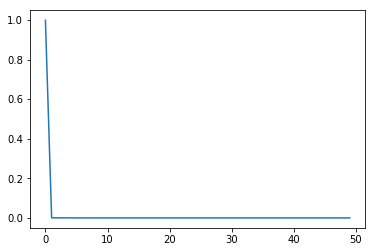

In [7]:
pca = PCA()
pca.fit(data_matrix)
plt.plot(pca.explained_variance_ratio_)
plt.show()

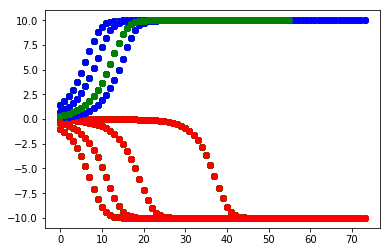

In [ ]:
pc1_unit = pca.components_[0]/np.linalg.norm(pca.components_[0])
for k in range(20):
    random_memory = np.random.uniform(-1, 1, [10, 10])
    random_memory_potential = f_inverse(0.9*random_memory)
    simulate_and_plot(0.001, 75, random_memory, random_memory_potential, weight_1, memory_2, pc1_unit)
    k +=1
plt.xlabel('Timesteps')
plt.ylabel('PC1')

In [14]:
# add memory 3 to network
weight_update(memory_3.flatten(), weight_1)

In [ ]:
# simulate the network 50 times from random initial conditions
data_matrix2 = np.zeros([50, 100])
for j in range(50):
    random_memory = np.random.uniform(-1, 1, [10, 10])
    random_memory_potential = f_inverse(0.9*random_memory)
    final_state = simulate(0.001, 30, random_memory, random_memory_potential, weight_1)
    data_matrix2[j, :] = final_state

In [ ]:
pca2 = PCA()
pca2.fit(data_matrix2)
plt.clf()
plt.plot(pca2.explained_variance_ratio_)
plt.show()